In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

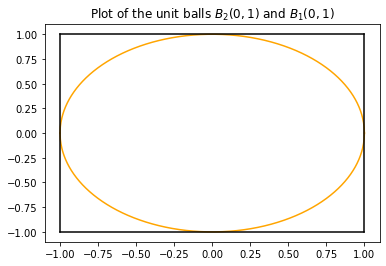

In [2]:
# We know that the area of a circle of radius 1 is \pi units^2
# First let's plot this circle contained in a square with sides of length 2
domain = np.linspace(-1,1,1000)

posCircle = np.sqrt(1-np.square(domain))
negCircle = -posCircle 

plt.title(r"Plot of the unit balls $B_{2}(0,1)$ and $B_{1}(0,1)$")
# circle
plt.plot(domain,posCircle, color="orange")
plt.plot(domain,negCircle, color="orange")
# square
plt.plot(domain, -np.ones(shape=len(domain)), color="k")
plt.plot(domain, np.ones(shape=len(domain)), color="k")
plt.plot(-np.ones(shape=len(domain)), domain, color="k")
plt.plot(np.ones(shape=len(domain)), domain, color="k")
plt.show()

In [3]:
# How can we approximate pi, the area of the unit circle?
# Suppose we generate N coordinates uniformly at random in [-1,1]^2
# The ratio of the number points in the circle to those in the square [-1,1]^2 should converge to the area of the circle/area of the square
# So a good approximation for pi should be 4*(#points in circle)/(#points in square) for large N
# (Note that N = (#points in square))
Ns = [10,100,1000,10000,100000,1000000,10000000]
dists = []

print("N","|","4*#circle/#square","|","Distance from pi")
print("----------------------------------------")
for N in Ns:
  count = 0
  data = stats.uniform.rvs(loc=-1,scale=2,size=(N,2))
  for coord in data:
    if (coord[0]**2 + coord[1]**2) < 1:
      count += 1
  ratio = 4*count/float(N)
  dists.append(abs(ratio-np.pi))
  print(str(N),"|",str(ratio),"|",str(dists[-1]))


N | 4*#circle/#square | Distance from pi
----------------------------------------
10 | 2.4 | 0.7415926535897932
100 | 2.96 | 0.18159265358979315
1000 | 3.096 | 0.04559265358979303
10000 | 3.1304 | 0.011192653589793267
100000 | 3.14576 | 0.004167346410206996
1000000 | 3.144032 | 0.002439346410207044
10000000 | 3.141986 | 0.00039334641020705163


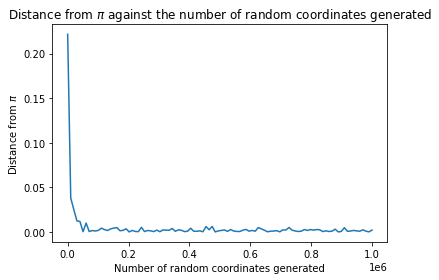

In [4]:
# Look at the relationship between N and the distance from pi (the error)
Ns = np.linspace(100,1000000,100)
dists = []
for N in Ns:
  count = 0
  data = stats.uniform.rvs(loc=-1,scale=2,size=(int(N),2))
  for coord in data:
    if (coord[0]**2 + coord[1]**2) < 1:
      count += 1
  ratio = 4*count/float(N)
  dists.append(abs(ratio-np.pi))

plt.title(r"Distance from $\pi$ against the number of random coordinates generated")
plt.ylabel(r"Distance from $\pi$")
plt.xlabel("Number of random coordinates generated")
plt.plot(Ns,dists)


In [5]:
# There appears to be some kind of reciprocal relationship (as expected)
from scipy.optimize import curve_fit 

def func(x,a,b):
  return (a/(x**b))

popt,pcov = curve_fit(func,Ns,dists)
print(popt,"\n")
print(pcov) # Variance-Covariance matrix

[2.5533822  0.52998033] 

[[0.02062399 0.00157724]
 [0.00157724 0.00012809]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in true_divide
  """


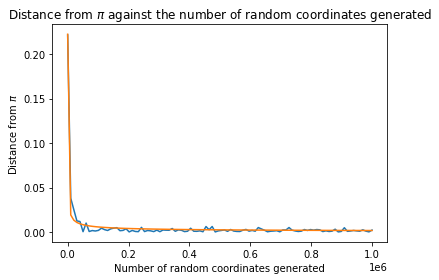

In [6]:
plt.title(r"Distance from $\pi$ against the number of random coordinates generated")
plt.ylabel(r"Distance from $\pi$")
plt.xlabel("Number of random coordinates generated")
plt.plot(Ns,dists)
plt.plot(Ns,(popt[0]/np.power(Ns,popt[1])))
plt.show()

In [7]:
print("Repeated running of the notebook indicates that the distance from pi is proportional to 1/sqrt(# of random coordinates generated)")

Repeated running of the notebook indicates that the distance from pi is proportional to 1/sqrt(# of random coordinates generated)
